## Alignment

In [45]:
import sys, os
sys.path.append('/home/luthra/understanding_ssl_v2/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

def set_border(g):
    for spine in ['top', 'bottom', 'left', 'right']:
        g.spines[spine].set_color('black')
        g.spines[spine].set_linewidth(1)

def plot_xy(nscl_train, nscl_test,
            scl_train, scl_test, 
            ce_train, ce_test,
            epochs,
            y_label='RSA',
            output_path=None):
    
    sns.set_theme(style="whitegrid", font_scale=3.0, rc={"xtick.bottom": True, "ytick.left": True})
    sns.set_context(rc={'patch.linewidth': 2.0})
    
    plt.figure(figsize=(12, 10))

    x_train = [i+1 for i in epochs]
    x_test = [i+1 for i in epochs]

    # Color Choices for Better Contrast
    nscl_color = 'blue'
    scl_color = 'red'
    ce_color = 'green'

    # NSCL
    g1 = sns.lineplot(x=x_train, y=nscl_train, alpha=1.0, color=nscl_color,
                      markersize=8, linewidth=2.0, label="NSCL Train")
    
    g2 = sns.lineplot(x=x_test, y=nscl_test, alpha=0.75, linestyle='--', color=nscl_color,
                      markersize=8, linewidth=2.0, label="NSCL Test")

    # SCL
    g3 = sns.lineplot(x=x_train, y=scl_train, alpha=1.0, color=scl_color,
                      markersize=8, linewidth=2.0, label="SCL Train")
    
    g4 = sns.lineplot(x=x_test, y=scl_test, alpha=0.75, linestyle='--', color=scl_color,
                      markersize=8, linewidth=2.0, label="SCL Test")

    # CE
    g5 = sns.lineplot(x=x_train, y=ce_train, alpha=1.0, color=ce_color,
                      markersize=8, linewidth=2.0, label="CE Train")
    
    g6 = sns.lineplot(x=x_test, y=ce_test, alpha=0.75, linestyle='--', color=ce_color,
                      markersize=8, linewidth=2.0, label="CE Test")

    set_border(plt.gca())

    # Create Custom Legends
    handles=[
        mlines.Line2D([], [], color=nscl_color, linestyle='-', label="NSCL"),
        mlines.Line2D([], [], color=scl_color, linestyle='-', label="SCL"),
        mlines.Line2D([], [], color=ce_color, linestyle='-', label="CE"),
    ]

    style_handles = [
        mlines.Line2D([], [], color='black', linestyle='-', label='Train'),
        mlines.Line2D([], [], color='black', linestyle='--', label='Test')
    ]

    legend1 = plt.legend(handles = handles, loc = 'lower right', fontsize=30)
    plt.gca().add_artist(legend1)
    plt.legend(handles=style_handles, loc = 'lower right', bbox_to_anchor = (0.7, 0.0), fontsize=30)
    plt.xscale('log')
    # plt.xticks([i+1 for i in x_train])
    
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    plt.xlabel("Training epochs")
    plt.ylabel(f"{y_label}")
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
    plt.show()

In [47]:
all_datasets = ['cifar10', 'cifar100']
dataset = all_datasets[1]

In [48]:
train_log_file = f'../results/{dataset}/alignment/train_alignment.csv'
test_log_file = f'../results/{dataset}/alignment/test_alignment.csv'
train_df = pd.read_csv(train_log_file, index_col='Epoch')
test_df = pd.read_csv(test_log_file, index_col='Epoch')
print(train_df.columns)
print(test_df.columns)

Index(['NSCL_RSA', 'SCL_RSA', 'NSCL_CKA', 'SCL_CKA', 'CE_RSA', 'CE_CKA'], dtype='object')
Index(['NSCL_RSA', 'SCL_RSA', 'NSCL_CKA', 'SCL_CKA', 'CE_RSA', 'CE_CKA'], dtype='object')


In [49]:
# RSA plot
plot_xy(test_df['NSCL_RSA'].values, test_df['NSCL_RSA'].values,
        test_df['SCL_RSA'].values, test_df['SCL_RSA'].values,
        test_df['CE_RSA'].values, test_df['CE_RSA'].values,
        epochs=test_df.index,
        y_label='RSA',
        output_path=f'../figures/exp1/{dataset}_rsa_plot.pdf')

ValueError: Data has no positive values, and therefore cannot be log-scaled.

Error in callback <function _draw_all_if_interactive at 0x7790bf719800> (for post_execute), with arguments args (),kwargs {}:


ValueError: Data has no positive values, and therefore cannot be log-scaled.

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 1200x1000 with 1 Axes>

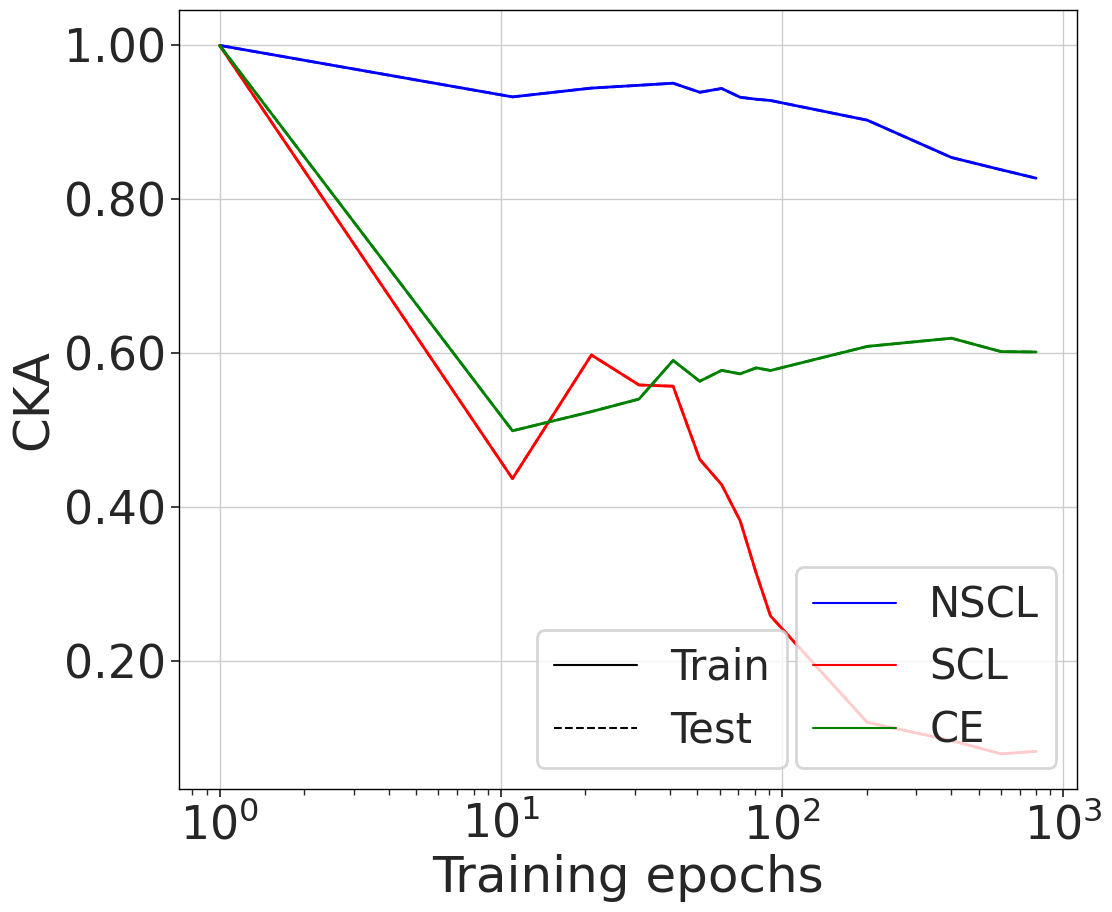

In [50]:
# CKA plot
plot_xy(test_df['NSCL_CKA'].values, test_df['NSCL_CKA'].values,
        test_df['SCL_CKA'].values, test_df['SCL_CKA'].values,
        test_df['CE_CKA'].values, test_df['CE_CKA'].values,
        epochs=test_df.index,
        y_label='CKA',
        output_path=f'../figures/exp1/{dataset}_cka_plot.pdf')

# NCCC

In [51]:
from collections import defaultdict

supervisions = ['dcl', 'nscl', 'scl', 'ce']
ncccs = defaultdict(dict)
epochs = None
for sup in supervisions:
    log_file = f'../results/{dataset}/nccc/{sup}_nccc.csv'
    df = pd.read_csv(log_file, index_col='Epoch')
    ncccs[sup]['train'] = df['NCCC Train'].values
    ncccs[sup]['test'] = df['NCCC Test'].values

    if epochs is None:
        epochs = df.index

In [52]:
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

def set_border(g):
    for spine in ['top', 'bottom', 'left', 'right']:
        g.spines[spine].set_color('black')
        g.spines[spine].set_linewidth(1)

def plot_xy(dcl_train, dcl_test,
            nscl_train, nscl_test,
            scl_train, scl_test, 
            ce_train, ce_test,
            epochs,
            y_label='RSA',
            output_path=None):
    
    sns.set_theme(style="whitegrid", font_scale=3.0, rc={"xtick.bottom": True, "ytick.left": True})
    sns.set_context(rc={'patch.linewidth': 2.0})
    
    plt.figure(figsize=(12, 10))

    x_train = [i+1 for i in epochs]
    x_test = [i+1 for i in epochs]

    # Color Choices for Better Contrast
    nscl_color = 'blue'
    scl_color = 'red'
    ce_color = 'green'
    dcl_color = 'orange'

    # NSCL
    g1 = sns.lineplot(x=x_train, y=nscl_train, alpha=1.0, color=nscl_color,
                      markersize=8, linewidth=2.0, label="NSCL Train")
    
    g2 = sns.lineplot(x=x_test, y=nscl_test, alpha=0.75, linestyle='--', color=nscl_color,
                      markersize=8, linewidth=2.0, label="NSCL Test")

    # SCL
    g3 = sns.lineplot(x=x_train, y=scl_train, alpha=1.0, color=scl_color,
                      markersize=8, linewidth=2.0, label="SCL Train")
    
    g4 = sns.lineplot(x=x_test, y=scl_test, alpha=0.75, linestyle='--', color=scl_color,
                      markersize=8, linewidth=2.0, label="SCL Test")

    # CE
    g5 = sns.lineplot(x=x_train, y=ce_train, alpha=1.0, color=ce_color,
                      markersize=8, linewidth=2.0, label="CE Train")
    
    g6 = sns.lineplot(x=x_test, y=ce_test, alpha=0.75, linestyle='--', color=ce_color,
                      markersize=8, linewidth=2.0, label="CE Test")
    
    # DCL
    g7 = sns.lineplot(x=x_train, y=dcl_train, alpha=1.0, color=dcl_color,
                      markersize=8, linewidth=2.0, label="DCL Train")
    g8 = sns.lineplot(x=x_test, y=dcl_test, alpha=0.75, linestyle='--', color=dcl_color,
                      markersize=8, linewidth=2.0, label="DCL Test")

    set_border(plt.gca())

    # Create Custom Legends
    handles=[
        mlines.Line2D([], [], color=nscl_color, linestyle='-', label="NSCL"),
        mlines.Line2D([], [], color=scl_color, linestyle='-', label="SCL"),
        mlines.Line2D([], [], color=ce_color, linestyle='-', label="CE"),
        mlines.Line2D([], [], color=dcl_color, linestyle='-', label="DCL"),
    ]

    style_handles = [
        mlines.Line2D([], [], color='black', linestyle='-', label='Train'),
        mlines.Line2D([], [], color='black', linestyle='--', label='Test')
    ]

    legend1 = plt.legend(handles = handles, loc = 'lower right', fontsize=30)
    plt.gca().add_artist(legend1)
    plt.legend(handles=style_handles, loc = 'lower right', bbox_to_anchor = (0.7, 0.0), fontsize=30)
    plt.xscale('log')
    # plt.xticks([i+1 for i in x_train])
    
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    plt.xlabel("Training epochs")
    plt.ylabel(f"{y_label}")
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
    plt.show()

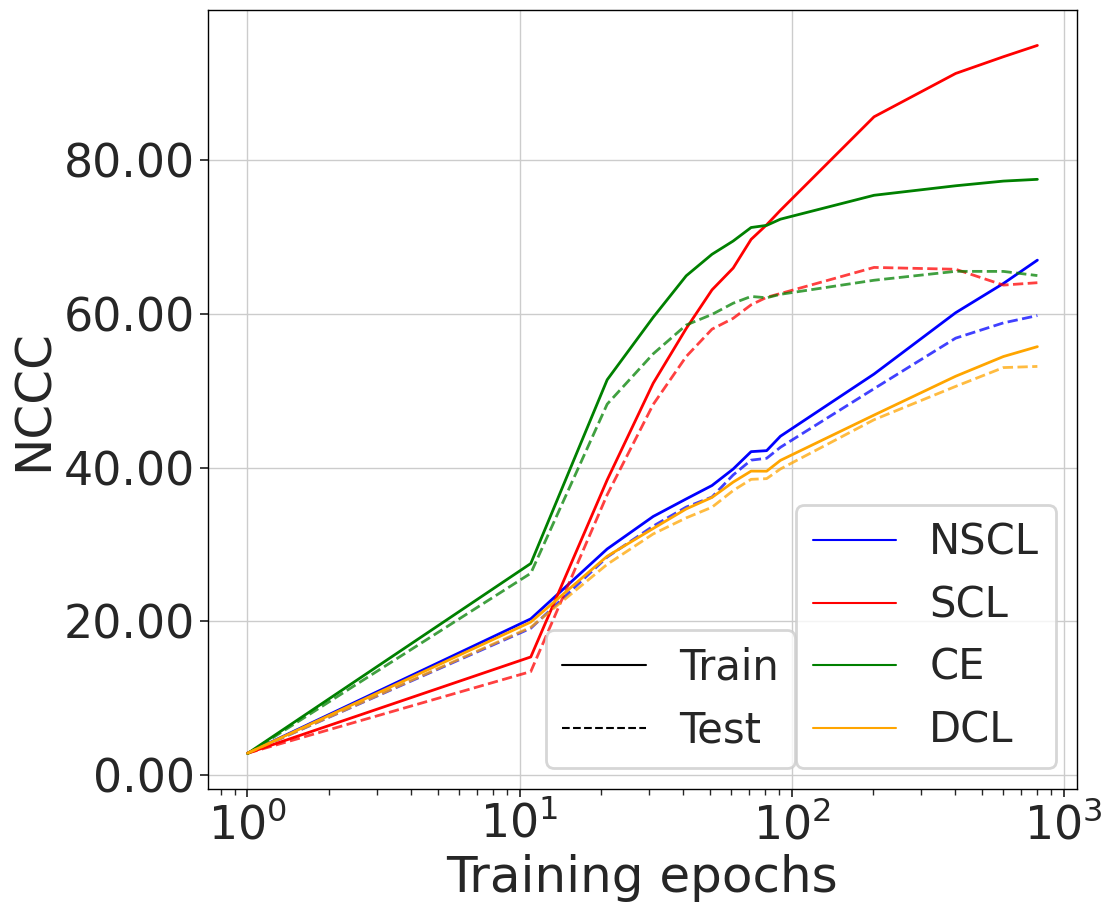

In [53]:
plot_xy(ncccs['dcl']['train'], ncccs['dcl']['test'],
        ncccs['nscl']['train'], ncccs['nscl']['test'],
        ncccs['scl']['train'], ncccs['scl']['test'],
        ncccs['ce']['train'], ncccs['ce']['test'],
        epochs=epochs,
        y_label='NCCC',
        output_path=f'../figures/nccc/{dataset}_nccc_plot.pdf')